# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Obtain the value of lats and lngs, list element 0
lats[0]
lngs[0]
url=f'https://api.openweathermap.org/data/2.5/weather?lat={lats[0]}&lon={lngs[0]}&appid={weather_api_key}'


In [4]:
#URL value of the Api 
url

'https://api.openweathermap.org/data/2.5/weather?lat=1.0502842880013645&lon=-118.56561372784375&appid=e848b40bb749be029d557e8639f04344'

In [5]:
#Append all the list in one value
urls=[]
for latitude, longitud in zip(lats,lngs):
    url=f'https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitud}&appid={weather_api_key}'
    urls.append(url)


In [6]:
#Test of slaycing on the URLs
req=requests.get(urls[8])


In [7]:
#Check the status URLs list
req.status_code

200

In [8]:
#Select a value on JSON dictionary
req.json()


{'coord': {'lon': 175.465, 'lat': 52.2742},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 278.81,
  'feels_like': 274.37,
  'temp_min': 278.81,
  'temp_max': 278.81,
  'pressure': 1026,
  'humidity': 84,
  'sea_level': 1026,
  'grnd_level': 1026},
 'visibility': 10000,
 'wind': {'speed': 7.41, 'deg': 307, 'gust': 12.72},
 'clouds': {'all': 0},
 'dt': 1717539804,
 'sys': {'sunrise': 1717430437, 'sunset': 1717489955},
 'timezone': -32400,
 'id': 0,
 'name': '',
 'cod': 200}

In [9]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'
# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = urls[i]
    # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url) 
        # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.json()['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather.json()['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather.json()['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather.json()['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather.json()['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather.json()['wind']['speed']# YOUR CODE HERE

        #city_country = city_weather.json()['main']['country']# YOUR CODE HERE
        
        city_date = city_weather.json()['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          #"Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | letterkenny
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | st. john's
Processing Record 5 of Set 1 | igarka
Processing Record 6 of Set 1 | kapa'a
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | castillos
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ashford
Processing Record 13 of Set 1 | novodvinsk
Processing Record 14 of Set 1 | barkhan
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | lodja
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | tinajo
Processing Record 19 of Set 1 | pointe-noire
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df = pd.DataFrame.from_dict(city_data)
city_data_df = pd.DataFrame(city_data)
# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          622
Lat           622
Lng           622
Max Temp      622
Humidity      622
Cloudiness    622
Wind Speed    622
Date          622
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,san patricio,1.0503,-118.5656,298.15,70,95,5.99,1717539805
1,letterkenny,55.4036,-8.2944,283.30,64,82,13.10,1717539806
2,cockburn town,24.0677,-68.3544,299.66,77,100,2.48,1717539807
3,st. john's,43.8618,-46.8702,289.98,88,100,9.41,1717539808
4,igarka,64.1044,85.3207,273.65,83,51,2.06,1717539809


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,san patricio,1.0503,-118.5656,298.15,70,95,5.99,1717539805
1,letterkenny,55.4036,-8.2944,283.30,64,82,13.10,1717539806
2,cockburn town,24.0677,-68.3544,299.66,77,100,2.48,1717539807
3,st. john's,43.8618,-46.8702,289.98,88,100,9.41,1717539808
4,igarka,64.1044,85.3207,273.65,83,51,2.06,1717539809


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

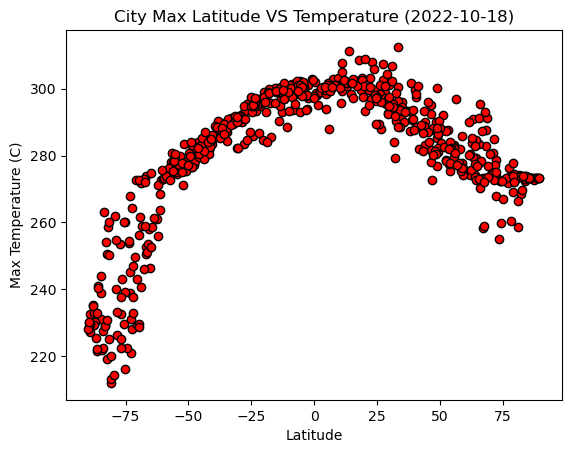

In [14]:
# Build scatter plot for latitude vs. temperature
x=city_data_df['Lat']
y=city_data_df['Max Temp']
plt.scatter(x,y, edgecolors='black',facecolors='red')
#plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black',facecolors='blue')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Max Latitude VS Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

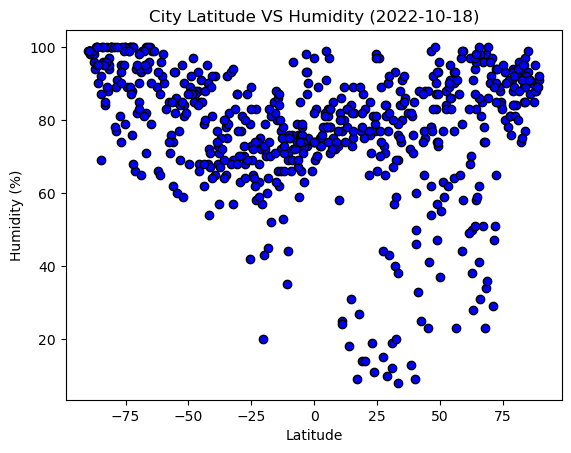

In [15]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df['Lat']
y=city_data_df['Humidity']
plt.scatter(x,y, edgecolors='black',facecolors='blue')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

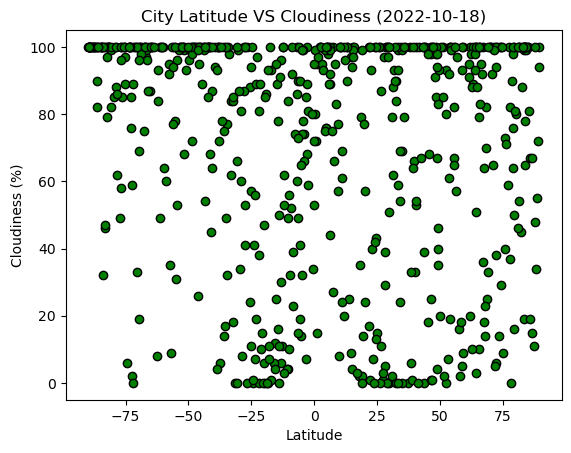

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df['Lat']
y=city_data_df['Cloudiness']
plt.scatter(x,y, edgecolors='black',facecolors='green')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

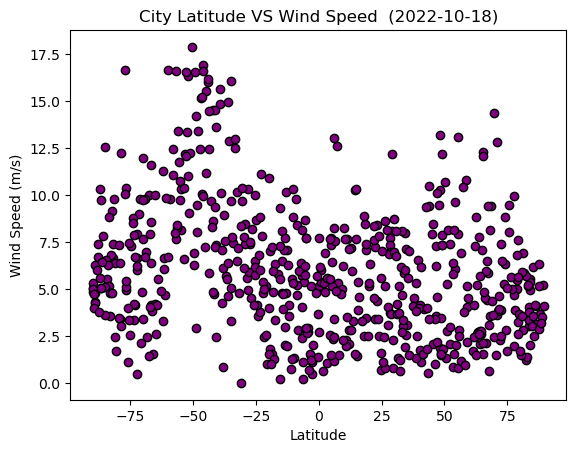

In [17]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df['Lat']
y=city_data_df['Wind Speed']
plt.scatter(x,y, edgecolors='black',facecolors='purple')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Wind Speed  (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
# def create_linear_regression_plot(city_data_df, city_data):

#     value_plots = np.poly1d(np.polyfit(city_data_df[city_data[0]], city_data_df[city_data[1]], 1))

#     # Create a scatter plot of X and y
#     plt.scatter(city_data_df[city_data[0]], city_data_df[city_data[1]])

#     # Plot the linear regression line
#     plt.plot(city_data_df[city_data[0]], value_plots(city_data_df[city_data[0]]), color='red')

#     # Set the plot title and labels
#     plt.title('Linear Regression Plot')
#     plt.xlabel(city_data[0])
#     plt.ylabel(city_data[1])

#     # Display the plot
#     plt.show()

# YOUR CODE HERE
def create_linear_regression_plot(x_line,y_line,title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_line,y_line)
    regress_values = x_line * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.scatter(x_line, y_line)
    plt.plot(x_line, regress_values, 'r', label=line_eq)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')

    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat'] >= 0]

# YOUR CODE HERE

# Display sample data
# northern_hemi_df.sort_values(by='City_ID', ascending=True)
city_data_df.sort_index(inplace=True)
# northern_hemi_df.sort_values(by='City')
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,san patricio,1.0503,-118.5656,298.15,70,95,5.99,1717539805
1,letterkenny,55.4036,-8.2944,283.30,64,82,13.10,1717539806
2,cockburn town,24.0677,-68.3544,299.66,77,100,2.48,1717539807
3,st. john's,43.8618,-46.8702,289.98,88,100,9.41,1717539808
4,igarka,64.1044,85.3207,273.65,83,51,2.06,1717539809


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
6,bredasdorp,-81.6882,25.6725,225.23,97,100,7.40,1717539811
7,castillos,-42.1717,-46.6702,285.47,68,100,8.61,1717539811
9,adamstown,-46.3431,-136.5335,284.08,88,26,10.03,1717539813
14,puerto natales,-68.8020,-88.6183,271.93,93,100,6.98,1717539818
15,lodja,-2.8225,23.7803,293.88,93,100,1.13,1717539819


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7696254110905164


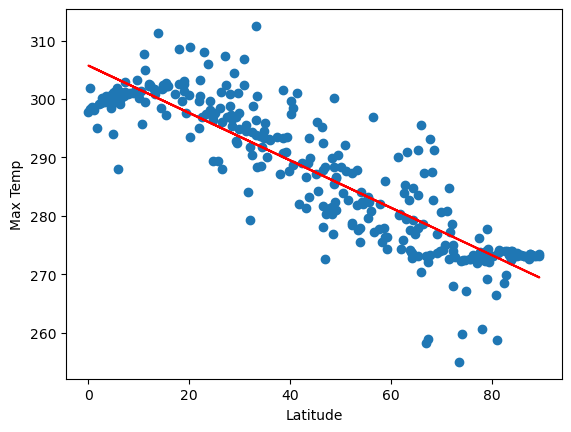

In [21]:
# Linear regression on Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Max Temp']
create_linear_regression_plot(x_line,y_line,'Max Temp',(6,-20))
# YOUR CODE HERE

The r-value is: 0.8310337052181452


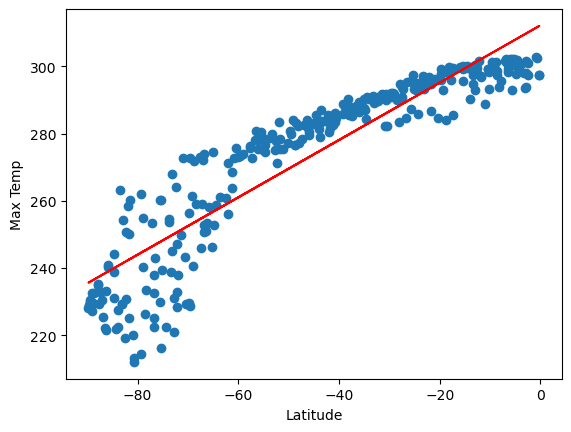

In [22]:
# Linear regression on Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Max Temp']
create_linear_regression_plot(x_line,y_line,'Max Temp',(-55,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.051848206139466314


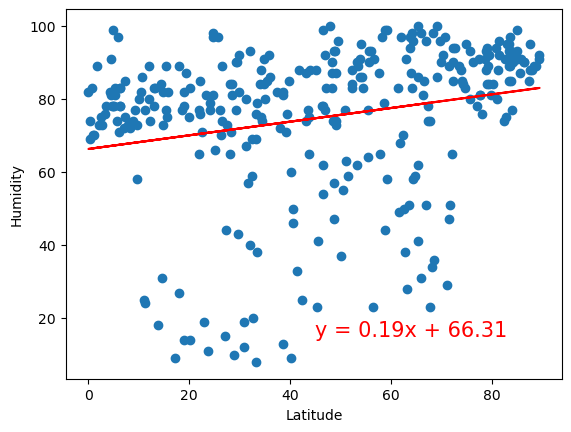

In [23]:
# Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Humidity']
create_linear_regression_plot(x_line,y_line,'Humidity',(45,15))
# YOUR CODE HERE

The r-value is: 0.3579189765016547


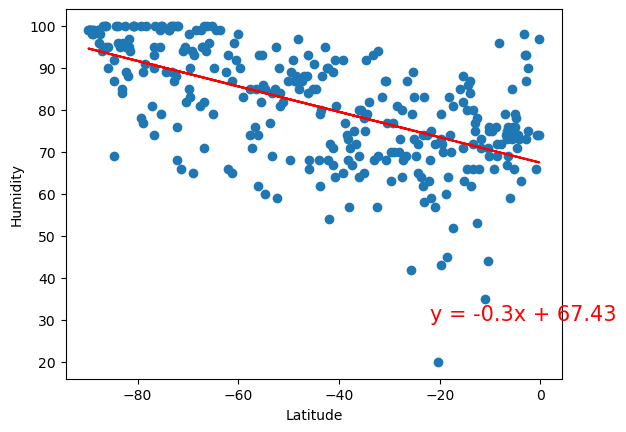

In [24]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Humidity']
create_linear_regression_plot(x_line,y_line,'Humidity',(-22,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0002684414921937779


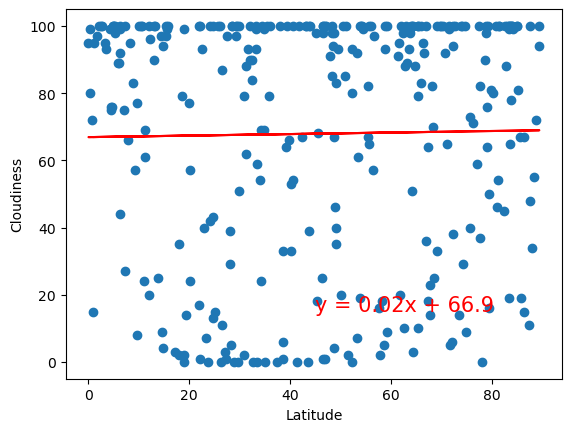

In [25]:
# Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Cloudiness']
create_linear_regression_plot(x_line,y_line,'Cloudiness',(45,15))
# YOUR CODE HERE

The r-value is: 0.18556318719242565


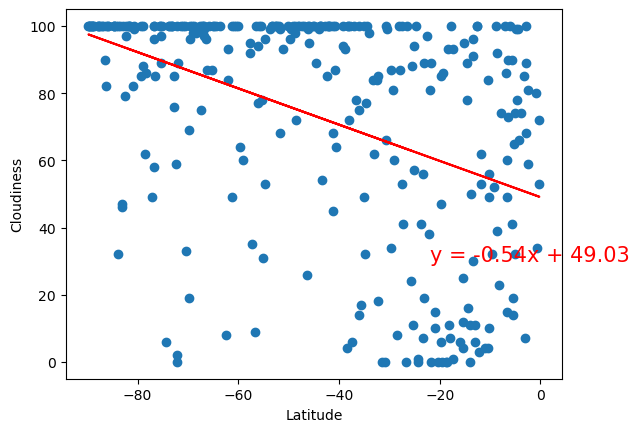

In [26]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Cloudiness']
create_linear_regression_plot(x_line,y_line,'Cloudiness',(-22,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003857454295504412


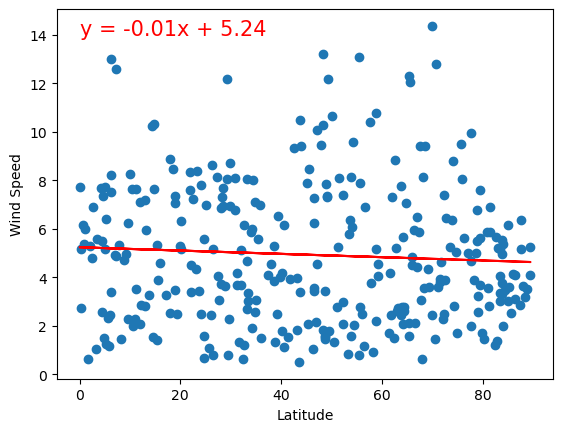

In [27]:
# Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Wind Speed']
create_linear_regression_plot(x_line,y_line,'Wind Speed',(0,14))
# YOUR CODE HERE

The r-value is: 0.02642156096598888


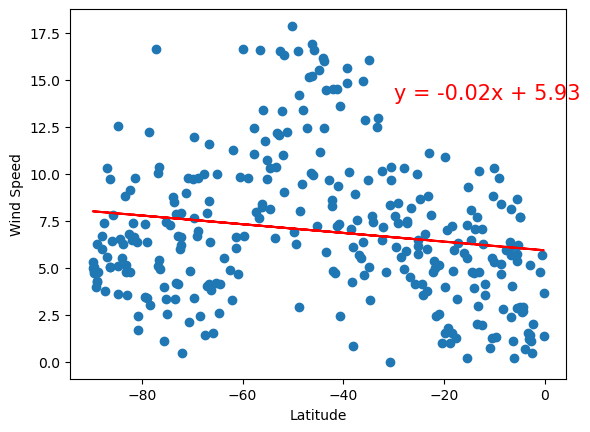

In [28]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Wind Speed']
create_linear_regression_plot(x_line,y_line,'Wind Speed',(-30,14))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE